Text(0.5, 0, 'Time (μs)')

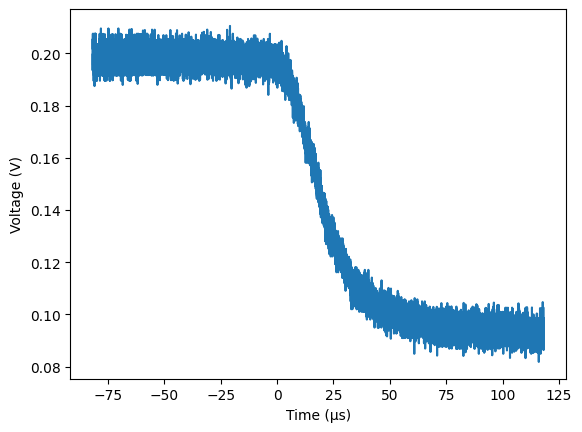

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your CSV file
#file_path = r'C:\Users\Dell\OneDrive - University of Cambridge\Shared Documents - PHY_US Group\MBQD-Shared\AION\Personnel\Yijun\code\ringdown\ringdown.csv'
file_path = r'C:\Users\Dell\Desktop\ringdown_20250226.csv'

# Read the CSV file starting from row 3 (skip the first 2 rows) and only read the first and third columns
df = pd.read_csv(file_path, skiprows=2, usecols=[0, 1])

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=[df.columns[0], df.columns[1]])

# t in second (first column)
t = df.iloc[:, 0].values

# v in volts (third column)
v = df.iloc[:, 1].values

# Convert to numpy arrays
t = np.array(t) 
v = np.array(v)

plt.plot(t* 1e6 + 18.227999999999998, v)
plt.ylabel('Voltage (V)')
plt.xlabel('Time (μs)')


0.4827339999999971

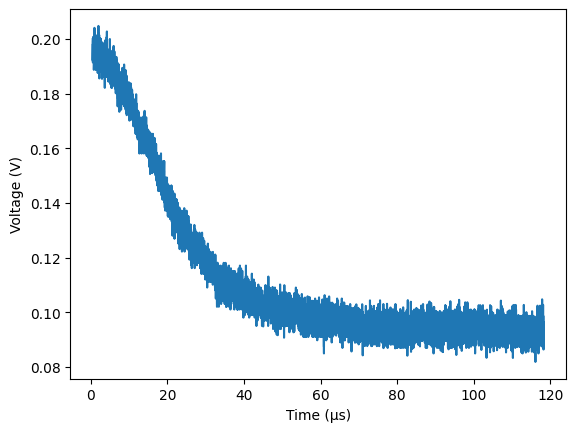

In [2]:
t1, t2 = 23500, -1
t_subset = t[t1:t2] * 1e6 + 18.227999999999998  # t in us
v_subset = v[t1:t2] # signal in V


plt.plot(t_subset, v_subset)
plt.ylabel('Voltage (V)')
plt.xlabel('Time (μs)')
t_subset[0]

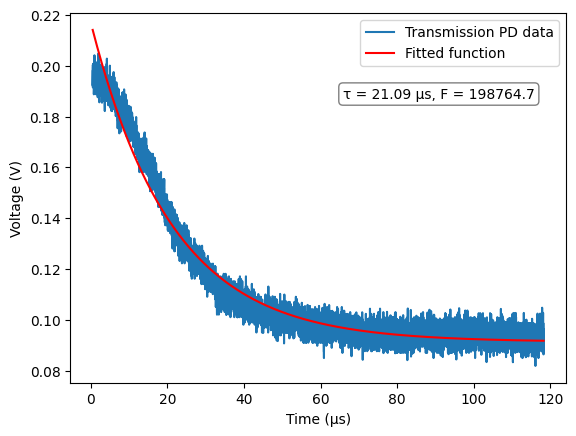

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(t, a, b, c):
    return a * np.exp(b * t) + c

# Fit the exponential function to the data
params, params_covariance = curve_fit(exponential_func, t_subset, v_subset, p0=[10, -1, 1])

# Plot the original data
plt.plot(t_subset, v_subset, label='Transmission PD data')

# Plot the fitted curve
t_fit = np.linspace(min(t_subset), max(t_subset), 1000)
v_fit = exponential_func(t_fit, *params)

tau = abs(1/params[1])
F = 2 * np.pi * tau * 1e-6 * 1.5e9 
textstr = 'τ = ' + str(f'{tau:.2f}') + ' μs, F = ' + str(f'{F:.1f}')

plt.plot(t_fit, v_fit, label='Fitted function', color='red')
plt.text(0.55, 0.8, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.ylabel('Voltage (V)')
plt.xlabel('Time (μs)')
plt.legend()
plt.show()

In [4]:
gain = [0 , 10 , 20, 30 ,40]
shutdown_time = [2, 3,2.9,3.3,15.6]

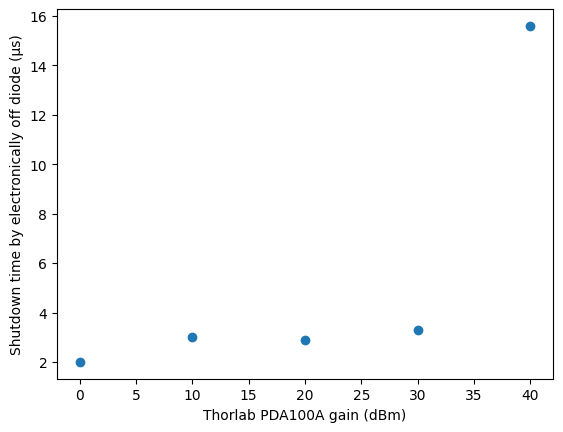

In [9]:
plt.plot(gain, shutdown_time, 'o')
plt.ylabel('Shutdown time by electronically off diode (μs)')
plt.xlabel('Thorlab PDA100A gain (dBm)')
plt.show()